# Spaceship Titanic

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', font_scale=1.4)

In [2]:
train = pd.read_csv('C:/Users/Gabriel Cordeiro/Desktop/Spaceship_Titanic/train.csv')
test = pd.read_csv('C:/Users/Gabriel Cordeiro/Desktop/Spaceship_Titanic/test.csv')

## Data

In [3]:
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print('MISSING NO SET DE TREINO:')
print(train.isna().sum())
print('')
print('MISSING NO SET DE TESTE:')
print(test.isna().sum())

MISSING NO SET DE TREINO:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

MISSING NO SET DE TESTE:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
print(f'LINHAS DUPLICADAS NO SET DE TREINO: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'LINHAS DUPLICADAS NO SET DE TESTE: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

LINHAS DUPLICADAS NO SET DE TREINO: 0, (0.0%)

LINHAS DUPLICADAS NO SET DE TESTE: 0, (0.0%)


In [6]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

A cardinalidade alta em features como Cabin faz com que seja melhor criar um grupo futuramente ou avaliar de outra forma

In [7]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

## EDA

#### Distribuição da variável alvo

Text(0.5, 1.0, 'Distribuição da Variável Alvo')

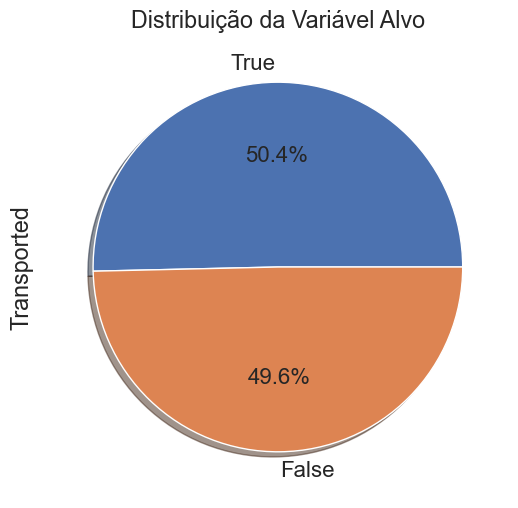

In [8]:
plt.figure(figsize=(6,6))

train['Transported'].value_counts().plot.pie(autopct='%1.1f%%', 
                                             shadow=True, textprops={'fontsize':16}).set_title("Distribuição da Variável Alvo")

A distribuição é bem homogenea, é possível usar acurácia como uma métrica de sucesso

### Variáveis Contínuas

Text(0.5, 0, 'Idade')

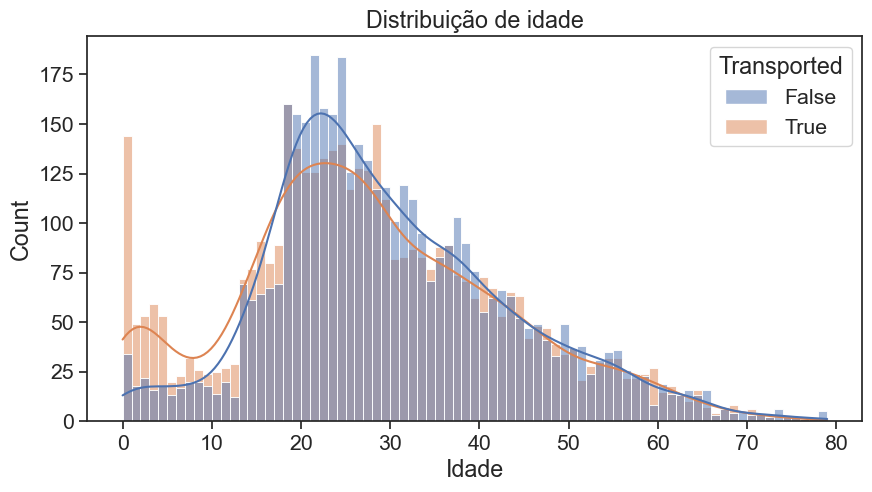

In [9]:
# Figure size
plt.figure(figsize=(10,5))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Distribuição de idade')
plt.xlabel('Idade')

- Crianças e adolecentes (até os 18) tem cahnce de serem transportados maior do que a de não serem,
  com destaque para as dcrianças de 0-5 anos
  
- Jovens adultos (18-25) tem uma chance maior de não serem transportados do que de serem  

- A probabilidade de serem transportados vai aumentando a partir dos 26 e fica pareada com a de não 
  serem na casa dos 45 aos em diante

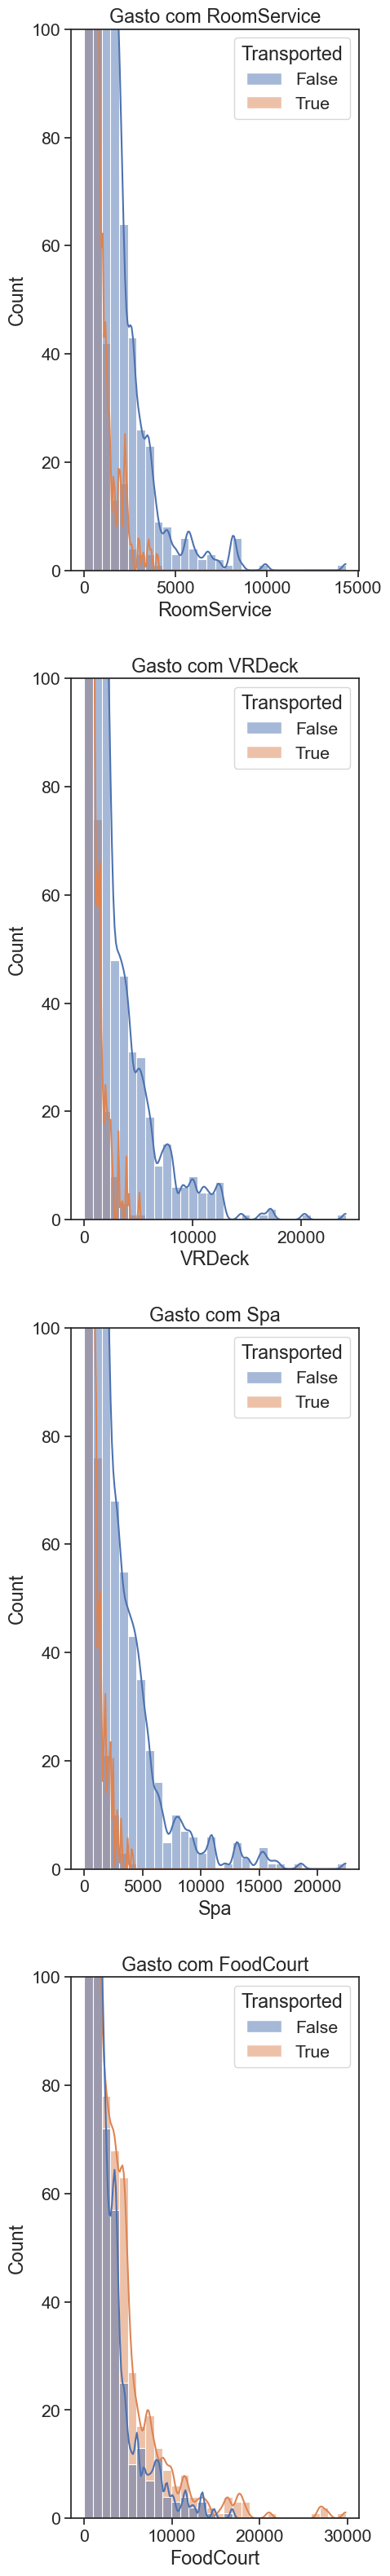

In [10]:
#Variáveis de gasto

gst_var = ['RoomService', 'VRDeck', 'Spa', 'FoodCourt']

# Plot expenditure features
fig=plt.figure(figsize=(10,30))
for i, var_name in enumerate(gst_var):
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title('Gasto com' + ' ' + var_name)
plt.show()

É posível observar que a maior parte dos passageiros não gastaram ou gastaram muito pouco. 
Além disso, distribuição de quantia gasta cai abruptamente

Vou criar uma variável chamada Gasto 0, que avalia se o passageiro teve um gasto igual a 0 ou não

Text(0.5, 1.0, 'Distribuição de Gasto zero')

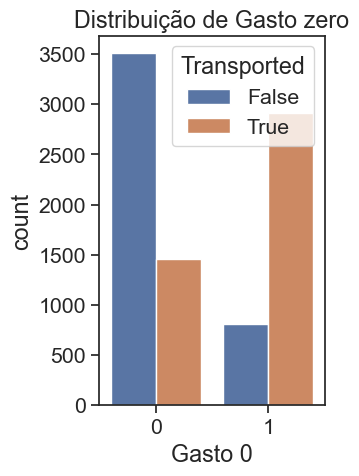

In [11]:
train['Expenditure']=train[gst_var].sum(axis=1)
train['Gasto 0']=(train['Expenditure']==0).astype(int)

plt.subplot(1,2,2)
sns.countplot(data=train, x='Gasto 0', hue='Transported')
plt.title('Distribuição de Gasto zero')

Aparentemente, Quem não teve gastos está mais propenso a ser transportado

<AxesSubplot:xlabel='Age', ylabel='Count'>

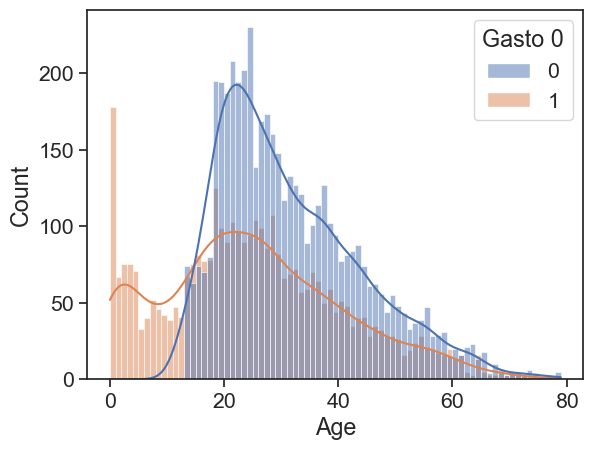

In [12]:
sns.histplot(data=train, x='Age', hue='Gasto 0', binwidth=1, kde=True)

- 0-18 não gastam
- Pico de pessoas que tiveram gastos entre os 20-30
- Porporção diminui mas ainda estão mais propensos a gastar do que não gastar
-Vale a pena observar posteriormente se quem gasta é de fato menos propenso a ser transportado
 ou se houve um viés por conta das crianças e adolecentes

Hipótese: A primeira observação sobre os gastos, de quem gatava tendia a não ser transportado quando comparado a quem não gastava, aconteceu porque estavamos olhando para todas as faixas etárias, mas crianças e adolecentes tem gasto 0. Vou criar um gráfico observando novamente isso mas agora considerando apenas adultos

<AxesSubplot:xlabel='Gasto 0', ylabel='count'>

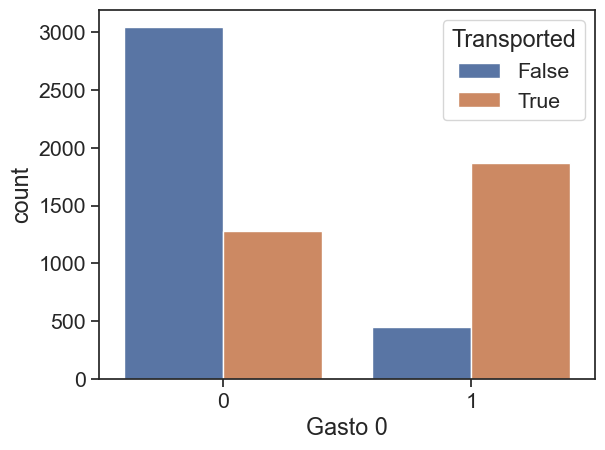

In [13]:
sns.countplot(data=train[train['Age'] > 18], x='Gasto 0', hue='Transported')

Mesmo considerando apenas adultos, ainda existem uma propensão maior a quem não gastou nada ser transportado, a hipótese criada não se confirma

Como a variável de grupo (extraida o ID de cada passageiro) tem uma alta cardinalidade, irei criar um uma variável que tome medida co tamanho dos grupos

In [14]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

IMPORTANTE: Aqui ja estou fazendo parte do tratamento dos dados mas é para poder fazer uma EDA melhor

Text(0.5, 1.0, 'Tamanho do grupo')

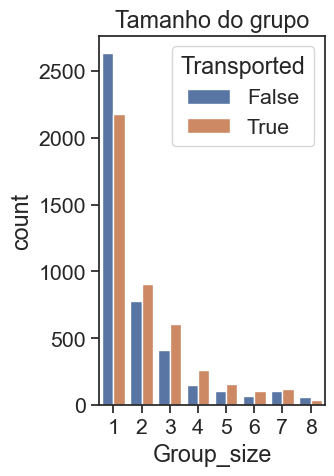

In [15]:
plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Tamanho do grupo')

A enorme maioria está viajando sozinho, então irei dividir em uma variável dummy

(0.0, 3000.0)

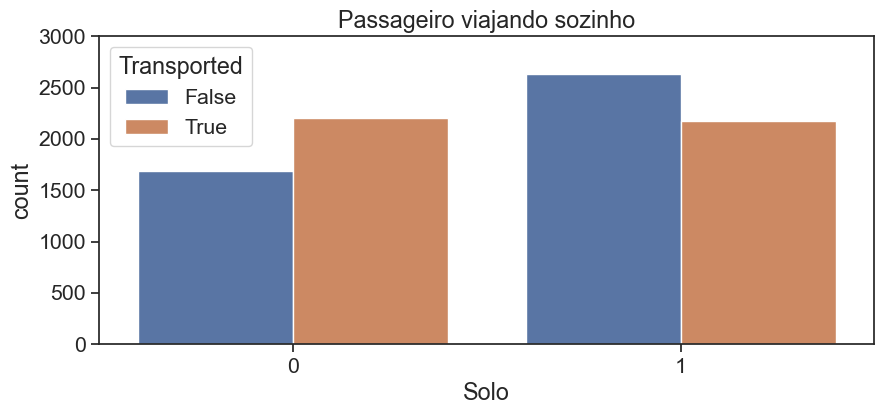

In [16]:
train['Solo']=(train['Group_size']==1).astype(int)
test['Solo']=(test['Group_size']==1).astype(int)

plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passageiro viajando sozinho')
plt.ylim([0,3000])

<AxesSubplot:xlabel='Solo', ylabel='count'>

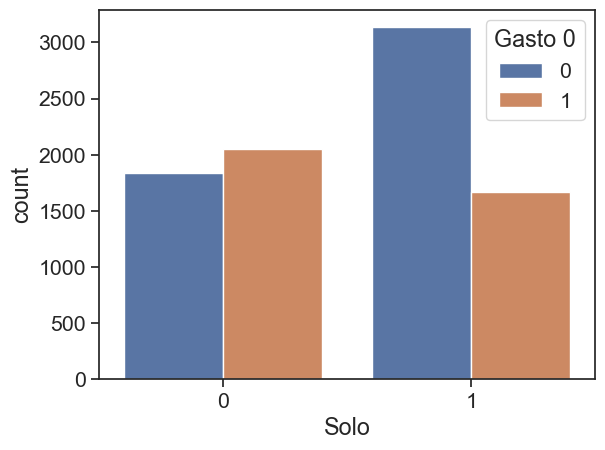

In [17]:
sns.countplot(data=train, x='Solo', hue='Gasto 0')

- Passageiros viajando em grupo tem uma chance maior de serem transportados, já os sozinhos tem mais chance de não serem

### Variáveis Categóricas

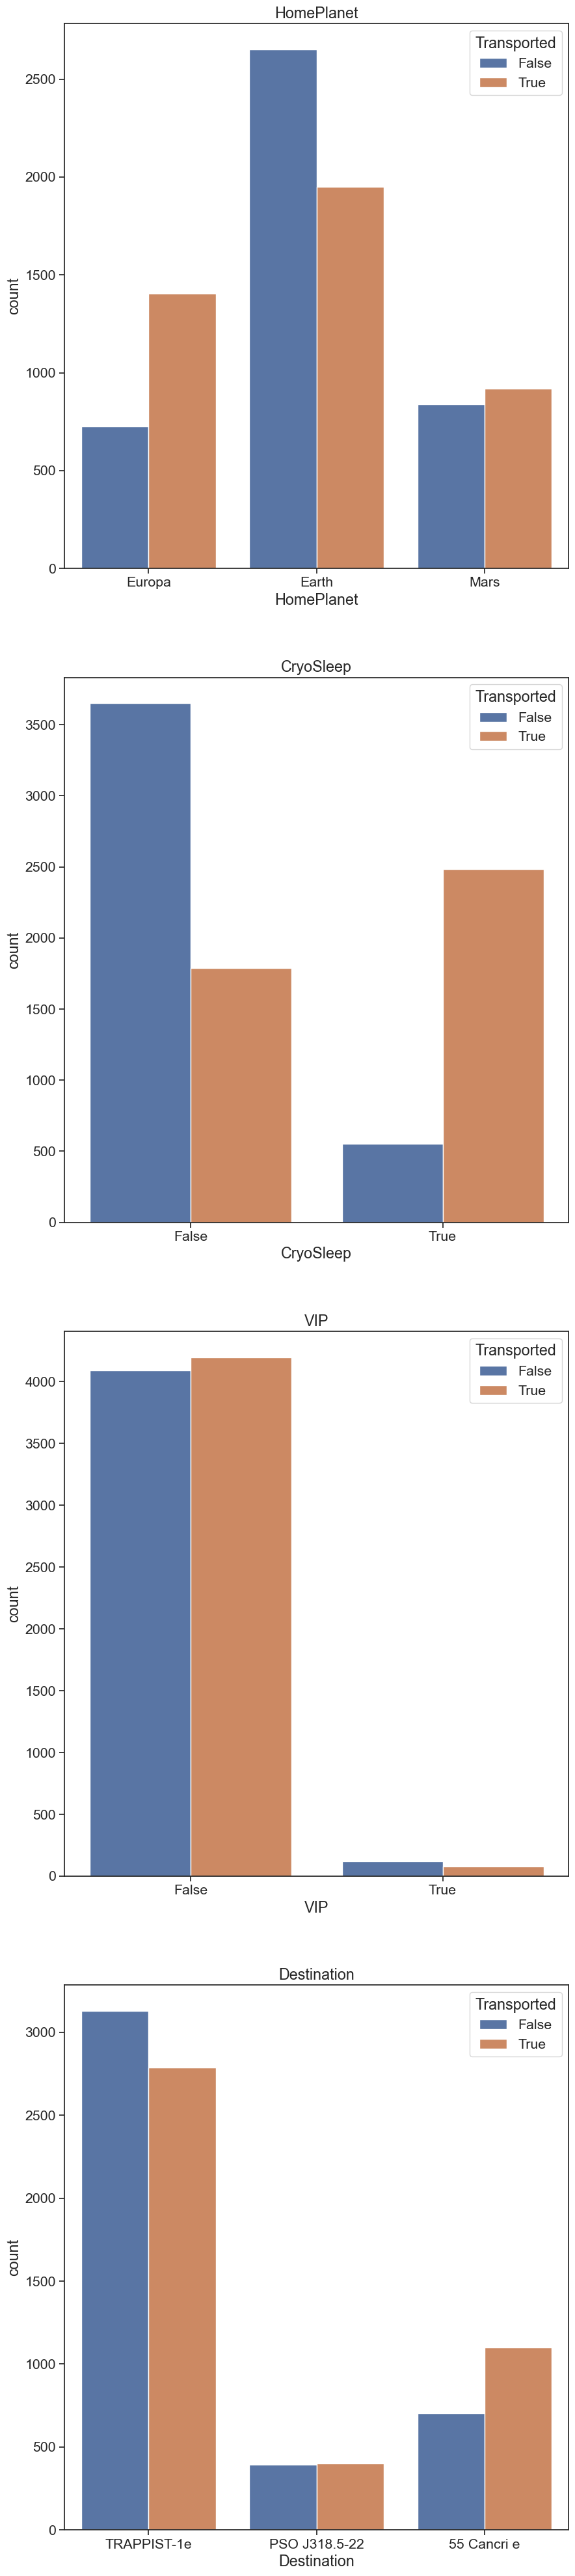

In [18]:
cat_var=['HomePlanet', 'CryoSleep', 'VIP', 'Destination']

# Plot categorical features
fig=plt.figure(figsize=(10,30))
for i, var_name in enumerate(cat_var):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
plt.show()

- Passageiros natais de Europa tem mais chance de terem sido transportados do que o contrário
  Já a chance para os de Marte é bastante semelhante, e menos provavél para os da Terra
- CryoSleep Parece afetar bastante a chance de ser transportado, ao contrário de VIP
- 55 Cancri e parece ser o destino que da mais chance de transporte, seguido de PSO com chances parecidas,e por fim TRAPPIST com chances menores de não ser transportado